# Project Overview

## Project Title: Investigate a Dataset (TMDb_Movies Dataset)


### Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling"> Data Wrangling</a></li>
    <li><a href="#eda"> Exploratory Data Analysis</a></li>
    <li><a href="#conclusions"> Conclusions</a></li>
</ul>

<a id="#intro"></a>
## Introduction

### Dataset Description 

> This is the TMDb movie dataset for data analysis. The data contains 10866 rows and 21 columns and contains records from the database of TMDb. The folowing features make up the dataset

> * id - Unique identifier for each movie
> * imdb_id - Unique identifier for each movie on imdb
> * popularity - Numerical presentation of how popular a movie is
> * budget - the movie budget
> * revenue - Global revenue generated by the movie
> * original title - Movie title before adaptation
> * cast -Names or lead and supporting actors
> * homepage - a web link to the movie
> * director - The movie director
> * tagline - The movie's tagline
> * keywords - keywords or tags related to the movie
> * overview - A brief description of the movie
> * runtime - The length of the movie in minutes
> * genre - which genre the movie falls
> * production_companies - Production house of the movie
> * release_date - date the movie was released
> * vote_count - number of votes the movie received
> * vote_average - average ratings the movie received
> * release_year - year the movie was released
> * budget_adj - budget adjusted for inflation as at 2010
> * revenue_adj -budget adjusted for inflation as at 2010

### Question(s) for Analysis
> 1. Which movie was most and least profitable?
> 2. Which movie has the highest and lowest budget?
> 3. Which movie recorded the most and least revenue?
> 4. Which movie genres were most profitable?
> 5. Which actor was most casted?
> 6. Which production house had the most succssful movies
> 7. Which movie director has the most successful movies?

In [1]:
# import libraries 
import pandas as pd
import numpy as np
from datetime import datetime
import pprint
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
sns.set()
%matplotlib inline


<a id="wrangling"></a>
## Data Wrangling
> In this step, I will ensure data quality by perform the following
> * Gather the data
> * Assess the data
> * Clean the data


### General Properties

In [2]:
# import pandas tmdb-movies.csv
import pandas as pd
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# checking for number of missing nulls in descending order
df.isnull().sum().sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
budget_adj                 0
release_year               0
vote_average               0
vote_count                 0
release_date               0
id                         0
runtime                    0
original_title             0
revenue                    0
budget                     0
popularity                 0
revenue_adj                0
dtype: int64

In [5]:
# Percentage of missing values in descending order
def missing(dff):
    print(round((dff.isnull().sum() * 100 / len(dff)),2).sort_values(ascending=False))
   
missing(df)

homepage                72.98
tagline                 25.99
keywords                13.74
production_companies     9.48
cast                     0.70
director                 0.40
genres                   0.21
imdb_id                  0.09
overview                 0.04
budget_adj               0.00
release_year             0.00
vote_average             0.00
vote_count               0.00
release_date             0.00
id                       0.00
runtime                  0.00
original_title           0.00
revenue                  0.00
budget                   0.00
popularity               0.00
revenue_adj              0.00
dtype: float64


In [6]:
print(sum(df.duplicated()))

1


In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Initial observations

1. Data contains 10866 rows and 21 columns
2. Four of the columns are of float data type, six are integers, and eleven are strings
3. Nine columns have missing values
4. homepage has the highest missing values with over 72% missing values, followed by tagline with 25.99% missing values
5. The dataset has only one duplicated row

---------------------------------------------------------

### Data Cleaning process

* Remove columns that do not commnunicate any relevant information
* Remove duplicate rows
* Remove rows wiht zero budgets on them since it means nothing was recorded
* Convert release_date to the appropirate datatype
* Drop missing values from the data

In [8]:
# Columns to delete
del_col = ['id','imdb_id','homepage','overview','budget','revenue','tagline','keywords']

# Delect columns
df = df.drop(del_col,1)

# Check data after deleting
df.head()


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# Check shape of dataframe after dropping columns
df.shape

(10866, 13)

### Justification for droping the following columns

> * **id, imdb_id**: This value is not necessary in analyzing information within the table.
> * **homepage, tagline, overview, keywords**: These values are unique to each row and cannot be used to make comparisons across multiple rows.
> * **budget, revenue**: Since the 'budget_adj' and 'revenue_adj' columns adjust the budget and revenue values in terms of 2010 dollars and will therefore allow for more accurate comparisons and analysis, these columns are not needed.


In [10]:
# Remove duplicate rows
df.drop_duplicates(keep='first',inplace=True)

# Check if duplicates have been removed
print(sum(df.duplicated()))

0


In [11]:
# Checking  for columns with zeros
(df[df.columns] ==0).sum().sort_values(ascending=False)

revenue_adj             6016
budget_adj              5696
runtime                   31
popularity                 0
original_title             0
cast                       0
director                   0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [12]:
# Drop missing values
df.dropna(inplace=True)
df.shape

(9772, 13)

In [13]:
# Drop runtime rows with zeros
df= df[df['runtime']!=0]
df.shape

(9759, 13)

In [14]:
# Checking  for columns with zeros after dropping missing values
(df[df.columns] ==0).sum().sort_values(ascending=False)

revenue_adj             5009
budget_adj              4739
popularity                 0
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [15]:
# Change release_date to datetime
df.release_date = pd.to_datetime(df['release_date'])
df[['release_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  9759 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 152.5 KB


In [16]:
# Convert budget and revenue to integers
con = ['budget_adj','revenue_adj']
df[con] = df[con].applymap(np.float64)
df.dtypes

popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [17]:
# Add profit column
df.insert(13,'profit',df['revenue_adj']-df['budget_adj'])
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


<a id="eda"></a>
## Exploratory Data Analysis

In this section, I answer questions after preparing the data for exploration

### Data Visualization 
This stage, I want to examine three variables; **revenue_adj, popularity and rating**

In [18]:
# Defining a boxplot to get the distribution of the three variables above.
def boxPlot(colName):
    df.boxplot(colName, vert=False, showfliers=False)


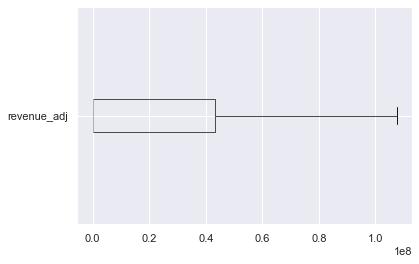

In [19]:
boxPlot('revenue_adj')

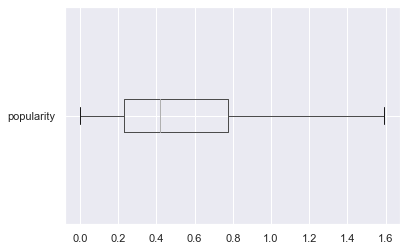

In [20]:
boxPlot('popularity')

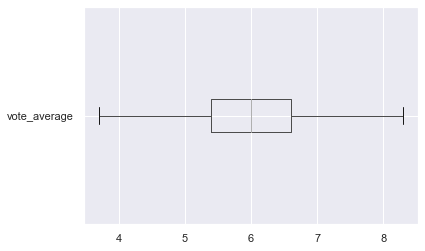

In [21]:
boxPlot('vote_average')

#### What I make of the boxplot
From the the box plots
> * Adjusted revenue for all movies is positively skewed and indicates on a few monvies made a couple of billions
> * Popularity is also positively skewed. We have the mean aroud 0.4
> * vote_average on the other hand indicates a normal distribution of all votes

### Next, I explore the bivariate relationships between the three variables in question using scatter plot

In [22]:
def scatter(col1,col2):
    df.plot(x=col1, y=col2, kind='scatter')
    plt.title('{} vs {}'.format(col1,col2))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

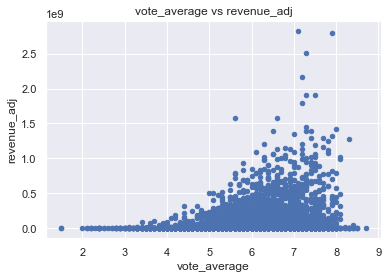

In [23]:
# scatter plot between profit and revenue_adj
scatter('vote_average','revenue_adj')

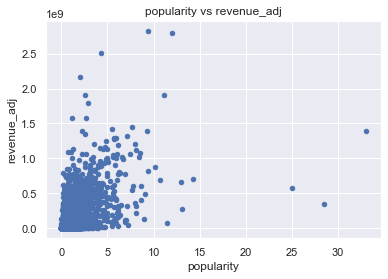

In [24]:
# # scatter plot between popularity and revenue_adf
scatter('popularity','revenue_adj')

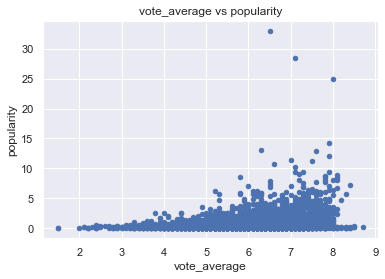

In [25]:
# scatter plot between average vote and revenue
scatter('vote_average','popularity')

In [26]:
# Correlation coefficient 
df[['revenue_adj','popularity','vote_average']].corr(method="pearson")

,revenue_adj,popularity,vote_average
revenue_adj,1.000000,0.606465,0.214465
popularity,0.606465,1.000000,0.238903
vote_average,0.214465,0.238903,1.000000


#### What I make of the scatter plots
From the the scatter plots and the correlation coefficient using pearson method
> * Adjusted revenue has a stronger bond with poppularity than with average vote. The relation between popularity and average vote is also week but positive. 

In [27]:
# Define a function to calculate profit
def calculate(col):
    # highest in terms of profit
    high=df[col].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    # lowerst in terms of profit
    low = df[col].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #Put it all in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info


###  Research Question 1 : Which movie was most and least profitable?


In [28]:
calculate('profit')

,1329,2244
popularity,12.037933,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74
vote_average,7.9,6.4


> * From this table, I compare the profits (last row) and this returns the movie with the highest profit and lowest profit in that order
> * Using the adjusted values for revenue and budget, row id 1329 is for movie with highest earning profit and 2244 for that with lowerst profit
> * Star Wars had the highest profit and The Warrior's day had the lowest


### Research Question 2: Which Movies have the  highest and lowerst budgets?




In [29]:
calculate('budget_adj')

,2244,30
popularity,0.25054,3.927333
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
production_companies,Boram Entertainment Inc.,BBC Films|See-Saw Films|FilmNation Entertainme...
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00
vote_count,74,425
vote_average,6.4,6.4


> * From this table, I compare the movie budget and this returns the movie with the highest and lowest budget in that order
> * Row id 2244 had the highest budget (Usd 425M)
> * Row id 30 had the lowest budget ($0) - *not realistic tho but that's what the data shows*

### Research Question 3: Which Movies recorded the most and least revenues?


In [30]:
calculate('revenue_adj')

,1386,48
popularity,9.432768,2.93234
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Current Entertainment|Lionsgate|Sierra / Affin...
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00
vote_count,8458,481
vote_average,7.1,5.3


> * From this table, I compare the movie adjusted revenue and this returns the movie with the highest and lowest revenue.
> * Row id 1386 (Avartar) had the largest revenue (Usd 2B+)
> * Row id 48 (Wild Card) had the smallest revenue ($0)

### Research Question 4: Most viewed Genres

In [31]:
# Function to take any column as argument and keep its track
def col_trans(col):
    data = df[col].str.cat(sep = '|')
    
    #Return pandas series and store the results separe
    data = pd.Series(data.split('|'))
    genre = data.value_counts(ascending=False)
    return genre

In [32]:
count = col_trans('genres')
count

Drama              4362
Comedy             3429
Thriller           2744
Action             2234
Romance            1568
Horror             1521
Adventure          1383
Crime              1299
Science Fiction    1135
Family             1094
Fantasy             839
Mystery             772
Animation           617
Music               338
Documentary         315
History             306
War                 258
Western             160
TV Movie            130
Foreign             120
dtype: int64

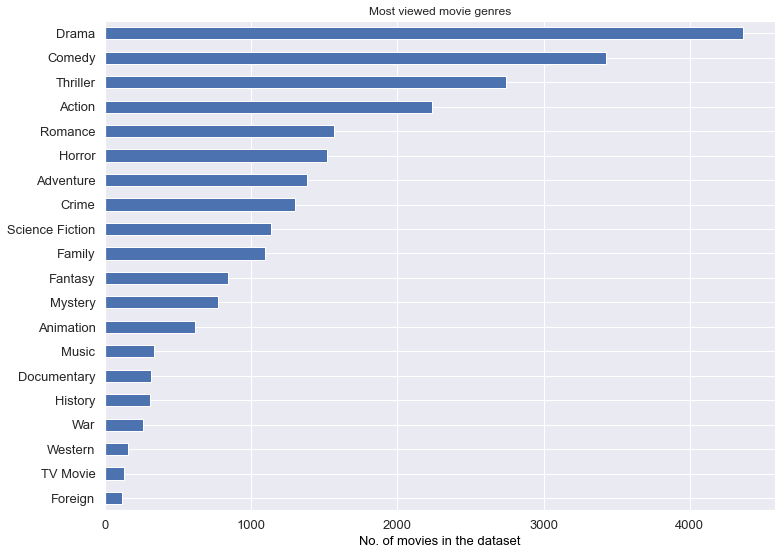

In [33]:
count.sort_values(ascending=True, inplace=True)

# Plotting
lt = count.plot.barh(fontsize=13)
lt.set(title = 'Most viewed movie genres')
# Axis label
lt.set_xlabel('No. of movies in the dataset', color= 'black', fontsize=13)
lt.figure.set_size_inches(12,9)

#plot
plt.show()

>* The count plot above is a visual plot for profitable genres or highly viewd movie genres.
>* Drama emerged as the most viewed movie genre and Foreign is the less viewed genre

### Research Question 5. Which actors were most casted?


In [34]:
cast = col_trans('cast')
cast.head(20)

Robert De Niro        72
Samuel L. Jackson     70
Bruce Willis          62
Nicolas Cage          61
Michael Caine         52
Robin Williams        51
Morgan Freeman        49
John Cusack           48
John Goodman          48
Susan Sarandon        47
Liam Neeson           47
Alec Baldwin          47
Julianne Moore        46
Tom Hanks             46
Gene Hackman          45
Dennis Quaid          45
Meryl Streep          44
Sylvester Stallone    44
Willem Dafoe          44
Ed Harris             43
dtype: int64

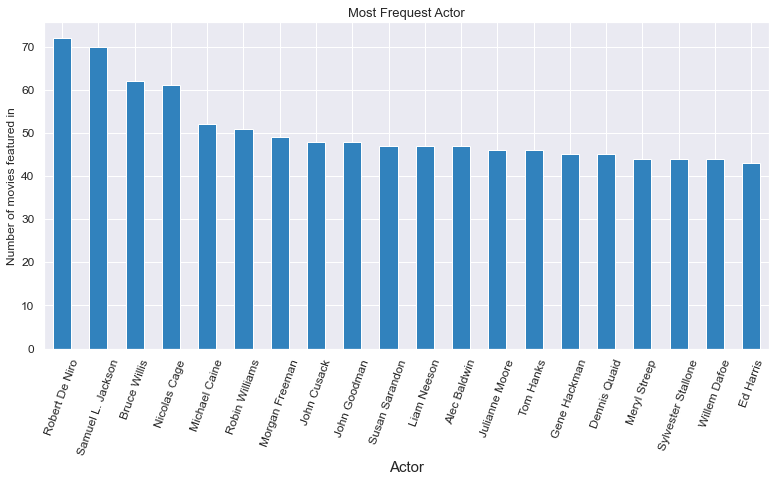

In [35]:
cast.iloc[:20].plot.bar(figsize=(13,6), colormap='tab20c', fontsize=12)
# Set up olot styles
plt.title("Most Frequest Actor", fontsize=13)
plt.xticks(rotation=70)
plt.xlabel('Actor', fontsize=15)
plt.ylabel("Number of movies featured in", fontsize=12)
sns.set_style("whitegrid")

>* The count plot above is a visual plot for the actor or actress with most movie.
>* Robert De Niro emerged the most cast actor

### Research Question 6: Which production house had the most successful movies?

In [36]:
pro = col_trans('production_companies')
pro.head(10)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64

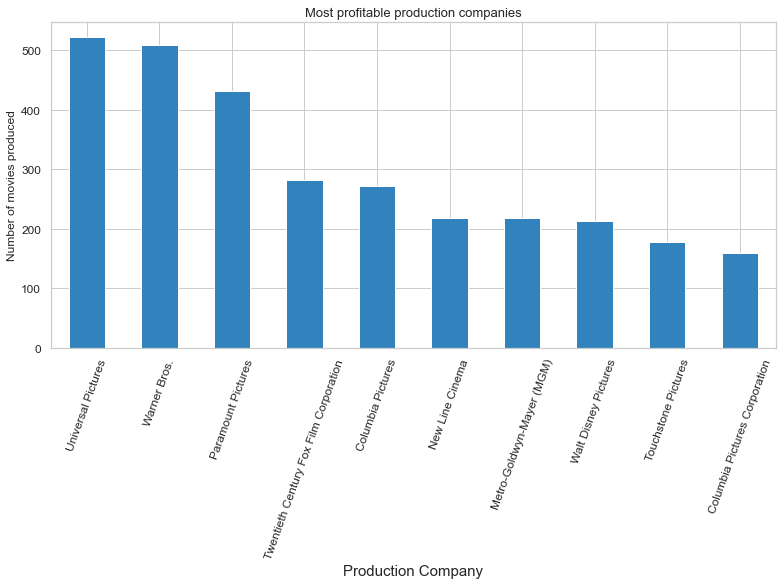

In [37]:
pro.iloc[:10].plot.bar(figsize=(13,6), colormap='tab20c', fontsize=12)
# Set up olot styles
plt.title("Most profitable production companies", fontsize=13)
plt.xticks(rotation=70)
plt.xlabel('Production Company', fontsize=15)
plt.ylabel("Number of movies produced", fontsize=12)
sns.set_style("whitegrid")

>* The count plot above is a visual plot for the production company with most movies.
>* Universal Pictures has the most produced movies

### Research Question 7: Which movie director was most successful?

In [38]:
director = col_trans('director')
director.head(20)

Woody Allen             43
Clint Eastwood          34
Steven Spielberg        30
Martin Scorsese         28
Ridley Scott            23
Steven Soderbergh       23
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
John Carpenter          19
Robert Rodriguez        19
Tim Burton              19
David Cronenberg        19
Barry Levinson          19
Wes Craven              19
Mike Nichols            18
Walter Hill             18
Francis Ford Coppola    18
Sidney Lumet            17
John Landis             17
dtype: int64

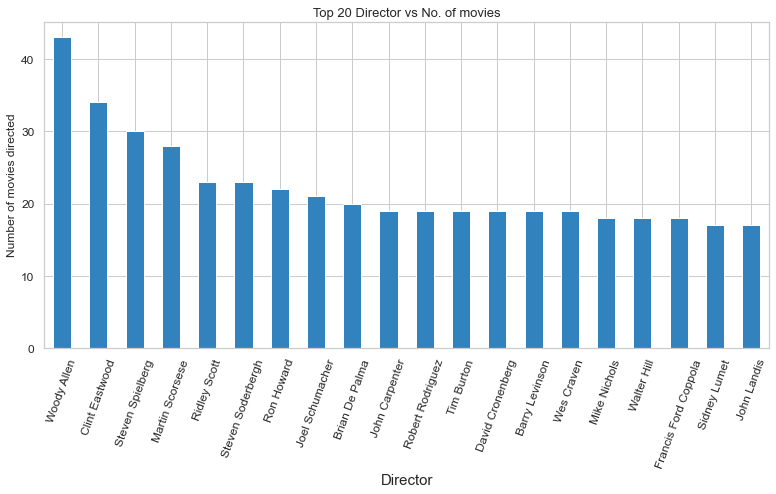

In [39]:
director.iloc[:20].plot.bar(figsize=(13,6), colormap='tab20c', fontsize=12)
# Set up olot styles
plt.title("Top 20 Director vs No. of movies", fontsize=13)
plt.xticks(rotation=70)
plt.xlabel('Director', fontsize=15)
plt.ylabel("Number of movies directed", fontsize=12)
sns.set_style("whitegrid")

>* The count plot above is a visual plot for directors with most directed movies movies.
>* Woody Allen has directed a lot more movies than any other director

### Other findings

####  Release year vs Profitability


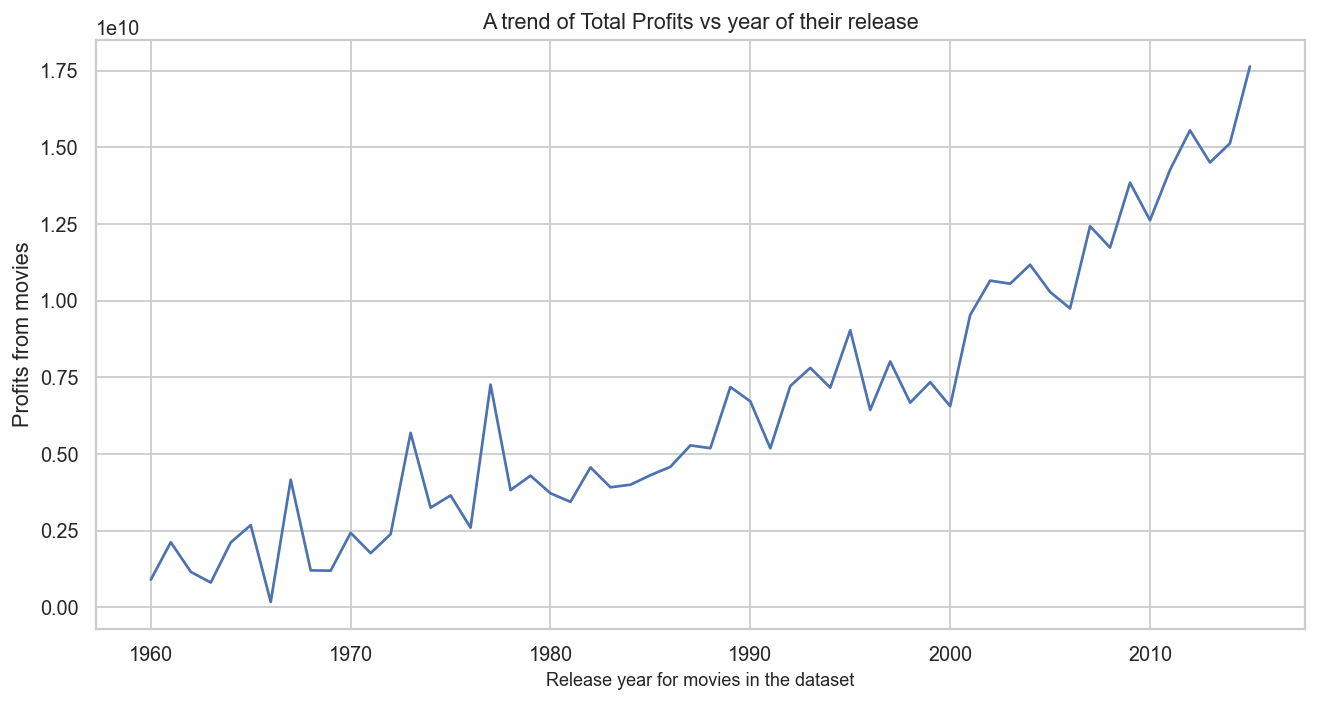

In [40]:
profit_year =  df.groupby('release_year')['profit'].sum()

# figure details
plt.figure(figsize=(12,6), dpi =130)
# axis
plt.xlabel('Release year for movies in the dataset', fontsize=10)
plt.ylabel('Profits from movies', fontsize=12)
plt.title('A trend of Total Profits vs year of their release')
#plot
plt.plot(profit_year)
plt.show()

>* The above chart is a trend analysis of profits made each year of movie release from 1960 to 2015 and we see a dip in  profits after 1978 and a climb just before 1990. After around 2006, there has been a constant rise in profits with 2015 recording the highest.

In [41]:
# Year with the highest profit
profit_year.idxmax()

2015

> * 2015 was the year which made the highest profit

In [42]:
# How many movies made profit, broke even or made losses
profit = df[df['profit'] > 0]
br_even = df[df['profit'] == 0]
loss = df[df['profit'] < 0]

print('{} Movies made Profit'.format(len(profit)))
print('{} Movies broke even'.format(len(br_even)))
print('{} Movies made losses'.format(len(loss)))

3701 Movies made Profit
3797 Movies broke even
2261 Movies made losses


<a id='conclusions'></a>
## Conclusions

> * The data presented was abount movies and associated data points. The main analyses done was to asnwer a couple of questions and use the data to answer. 

> * After the data was loaded, initial data exploration was conducted. The data showed a total column of 10866 and 21 columns and a total size of about 1.7 mb. Initial observations revealed some columns had missing values and a number of rows with zero values. A new column was formed (profit) derived from deductig the budget from the revenue.

> * From the Data analysis, Star Wars was most profitable, Avatar had the highest gross revenue of all time. Drama topped the chart for most viewed movie genre followed by comedy. Roberto Di Niro is the most casted actor and closely followed by Samuel L. Jackson from the dataset. Looking at the chart for the production companies, Universal pictures tops followed by Warner Bros. Woodey Allen emerged the director who has directed most movies. Considering the trends for movies that made much profit, 2015 was the most profitable year.

> * **Limitations**: During the data cleansing I noticed the data had a number of zeros especially for adjusted budget and adjusted revenue which will not warrant deletion since it will limit the analysis. Next, I propose a near populated data to allow accurate analysis
